In [19]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/follower_ids/follower_ids.csv', dtype='str')
df = df.drop_duplicates() # ~10 million to ~9 million

In [3]:
# users_type = {'user_id': 'int', 
#               'user_name': 'str',
#               'screen_name': 'str',
#               'description': 'str',
#               'follower_count': 'int',
#               'following_count': 'int',
#               'listed_count': 'int',
#               'favorite_count': 'int',
#               'status_count': 'int'} 
users = pd.read_csv('data/users/users.csv', dtype='str')
users.drop_duplicates(subset='user_id', inplace=True)
users = users[~users.user_id.isna()]
assert users.user_id.nunique() == users.shape[0] # this assertion is necessary to ensure pri key constraint is satisfied 

In [21]:
df = df.merge(users, how='left', left_on='follower_user_id', right_on='user_id')
df_subset = df[~df.user_id.isna()]
df_subset = df_subset[~df_subset.following_count.isna()]
df_subset['follower_count'] = df_subset['follower_count'].astype('int')
df_subset['following_count'] = df_subset['following_count'].astype('int')
df_subset['follower_following_ratio'] = df_subset['follower_count']/(df_subset['following_count'] + 1)

C:\Users\e0003200\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='following_count', ylabel='Density'>

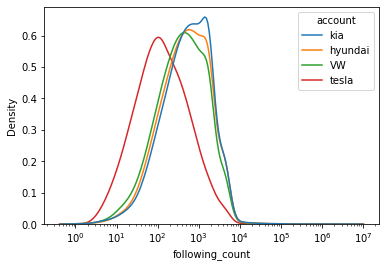

In [90]:
sns.kdeplot(df_subset['following_count']+1,
            log_scale=True,  
            bw=0.2, 
            hue=df_subset['account'],
            common_norm=False)

C:\Users\e0003200\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='following_count', ylabel='Density'>

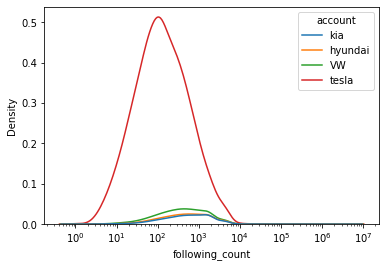

In [81]:
sns.kdeplot(df_subset['following_count']+1,
            log_scale=True,  
            bw=0.2, 
            hue=df_subset['account'])

C:\Users\e0003200\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='follower_count', ylabel='Density'>

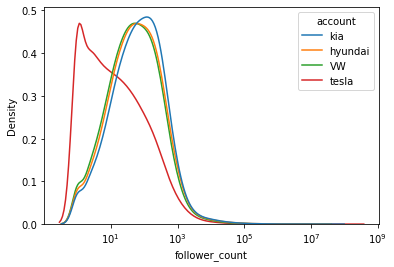

In [89]:
sns.kdeplot(df_subset['follower_count']+1, 
            log_scale=True,  
            bw=0.2, 
            hue=df_subset['account'], 
            common_norm=False)

C:\Users\e0003200\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='follower_count', ylabel='Density'>

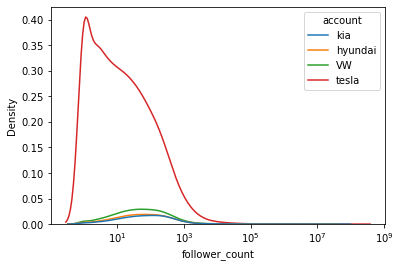

In [91]:
sns.kdeplot(df_subset['follower_count']+1, 
            log_scale=True,  
            bw=0.2, 
            hue=df_subset['account'])

In [97]:
# very popular followers, higher follower counts
pop = df_subset[df_subset['follower_count']>100000] # more than 100K followers

In [133]:
pop.shape

(3877, 16)

<AxesSubplot:xlabel='follower_count', ylabel='Count'>

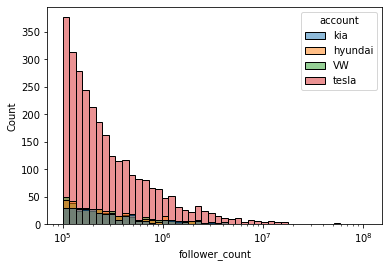

In [104]:
sns.histplot(data=pop, x='follower_count', 
            log_scale=True, hue='account')

C:\Users\e0003200\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='follower_following_ratio', ylabel='Density'>

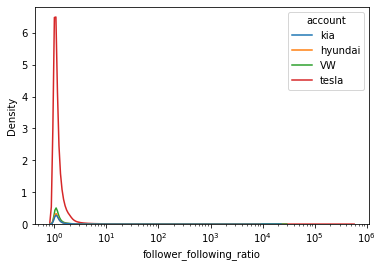

In [108]:
sns.kdeplot(df_subset['follower_following_ratio']+1, 
            log_scale=True,  
            bw=0.2, 
            hue=df_subset['account'])

C:\Users\e0003200\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='follower_following_ratio', ylabel='Density'>

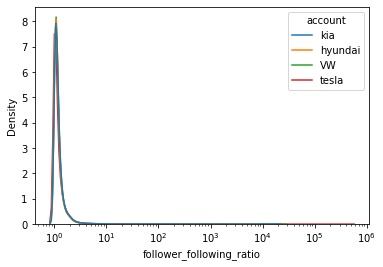

In [109]:
sns.kdeplot(df_subset['follower_following_ratio']+1, 
            log_scale=True,  
            bw=0.2, 
            hue=df_subset['account'],
            common_norm = False)

In [113]:
high_ratio = df_subset[df_subset['follower_following_ratio']>1000]

C:\Users\e0003200\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='follower_following_ratio', ylabel='Density'>

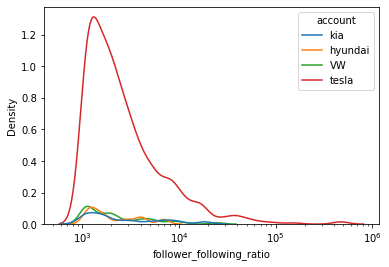

In [115]:
sns.kdeplot(high_ratio['follower_following_ratio'], 
            log_scale=True,  
            bw=0.2, 
            hue=high_ratio['account'])

In [136]:
low_follower_count = df_subset[df_subset['follower_count']<5]

In [137]:
low_follower_count.shape

(3539444, 16)

In [138]:
low_follower_count.account.value_counts()

tesla      3386987
VW           74899
hyundai      44065
kia          33493
Name: account, dtype: int64

In [139]:
df.account.value_counts()

tesla      8392632
VW          601466
hyundai     392583
kia         339997
Name: account, dtype: int64

In [140]:
3386987/8392632

0.40356672376436853

In [141]:
74899/601466

0.12452740470783054

In [142]:
44065/392583

0.1122437802961412

In [143]:
33493/339997

0.09850969273258293